# Previsão e Classificação da Qualidade de Laranjas com Aprendizado de Máquina

* Conjuto de dados: `Orange Quality Analysis Dataset` (qualidade da laranja)
* Müller Pereira da Silva

## Introdução

A avaliação da qualidade de produtos agrícolas é um processo essencial para assegurar eficiência produtiva, reduzir desperdícios e atender às exigências do mercado consumidor. Tradicionalmente, essa avaliação é realizada de forma empírica, baseada em critérios visuais e na experiência de especialistas, o que pode resultar em subjetividade e inconsistência nos resultados. Diante desse cenário, o uso de técnicas de ciência de dados e aprendizado de máquina surge como uma alternativa capaz de tornar esse processo mais objetivo, reprodutível e orientado por dados.

Com o aumento da disponibilidade de dados agrícolas e o avanço das técnicas computacionais, métodos de aprendizado supervisionado têm sido amplamente empregados na análise de atributos de qualidade a partir de características físicas e químicas dos produtos. Modelos simples e interpretáveis, como a regressão linear e classificadores lineares, destacam-se por possibilitar não apenas previsões eficazes, mas também a compreensão dos fatores que influenciam a qualidade, aspecto fundamental em aplicações práticas no setor agrícola.

Neste trabalho, é utilizado um conjunto de dados reais contendo informações sobre laranjas, incluindo variáveis relacionadas ao tamanho, peso, doçura, acidez, maciez, tempo de colheita e grau de maturação. A partir desses dados, busca-se analisar a relação entre tais características e a qualidade final do produto, explorando tanto a previsão de um índice contínuo de qualidade quanto a classificação das frutas em categorias de boa e baixa qualidade. Para esse fim, são aplicadas técnicas de regressão linear e o algoritmo Perceptron, permitindo comparar seus desempenhos e interpretações.

A metodologia adotada envolve uma análise exploratória dos dados, a construção e avaliação dos modelos preditivos e a aplicação de validação cruzada para verificar a robustez dos resultados. Ao longo do estudo, enfatiza-se a interpretabilidade dos modelos e a coerência dos resultados obtidos com o contexto agrícola, evidenciando o potencial de técnicas simples de aprendizado de máquina na resolução de problemas reais.

## Objetivo Geral

Investigar a relação entre características físicas e químicas das laranjas e sua qualidade final, utilizando técnicas de regressão e classificação baseadas em aprendizado de máquina, a fim de avaliar a capacidade desses modelos em prever e classificar a qualidade do produto.

## Objetivos Específicos

* Realizar uma análise exploratória dos dados, identificando padrões, distribuições e possíveis relações entre as variáveis do conjunto de dados.

* Aplicar um modelo de regressão linear para prever o valor contínuo da qualidade das laranjas e interpretar os coeficientes estimados.

* Construir um modelo de classificação utilizando o algoritmo Perceptron para separar laranjas de boa e baixa qualidade.

* Comparar os resultados obtidos pelos modelos de regressão e classificação, analisando a influência das variáveis em cada abordagem.

* Avaliar o desempenho e a robustez do classificador por meio de métricas adequadas e validação cruzada estratificada.

* Discutir as limitações do modelo e apontar possíveis melhorias e extensões para trabalhos futuros.

## Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Markdown
import seaborn as sns
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Leitura do conjunto de dados

In [28]:
df = pd.read_csv('orangeQualityData.csv')

df.head()


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


## Informações Iniciais

In [29]:
display(Markdown("### Primeiras linhas"))
display(df.head())

display(Markdown("### Últimas linhas"))
display(df.tail())

display(Markdown("### Informação das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()

### Primeiras linhas

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


### Últimas linhas

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0
240,7.3,282,10.5,2.9,4.0,21,2.0,Orange-Red,Jaffa,Y (Minor),4.0


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


### Quantidade de valores únicos

Size (cm)              41
Weight (g)            131
Brix (Sweetness)       82
pH (Acidity)           44
Softness (1-5)          9
HarvestTime (days)     22
Ripeness (1-5)          8
Color                   5
Variety                24
Blemishes (Y/N)        12
Quality (1-5)           8
dtype: int64

## Dados Faltantes

In [30]:
# percentual de dados faltantes em cada coluna

round((df.isna()).sum() / df.shape[0] * 100, 2)

Size (cm)             0.0
Weight (g)            0.0
Brix (Sweetness)      0.0
pH (Acidity)          0.0
Softness (1-5)        0.0
HarvestTime (days)    0.0
Ripeness (1-5)        0.0
Color                 0.0
Variety               0.0
Blemishes (Y/N)       0.0
Quality (1-5)         0.0
dtype: float64

## Dicionário de Dados


In [31]:
df_dict = pd.DataFrame(
    [
        {'variavel': 'Size (cm)', 'descricao': 'tamanho da fruta (cm)', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Weight (g)', 'descricao': 'peso da fruta (g)', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Brix (Sweetness)', 'descricao': 'docura da fruta', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'pH (Acidity)', 'descricao': 'acidez da fruta', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Softness (1-5)', 'descricao': 'maciez da fruta', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'HarvestTime (days)', 'descricao': 'tempo de colheita (dias)', 'tipo': 'quantitativa', 'subtipo': 'discreta'},
        {'variavel': 'Ripeness (1-5)', 'descricao': 'maturacao da fruta', 'tipo': 'quantitativa', 'subtipo': 'continua'},
        {'variavel': 'Color', 'descricao': 'cor da fruta', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'Variety', 'descricao': 'variedade de frutas', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'Blemishes (Y/N)', 'descricao': 'quaisquer manchas na fruta (Y/N)', 'tipo': 'qualitativa', 'subtipo': 'nominal'},
        {'variavel': 'Quality (1-5)', 'descricao': 'qualidade da fruta', 'tipo': 'quantitativa', 'subtipo': 'continua'}

    ]
)

df_dict

,variavel,descricao,tipo,subtipo
0,Size (cm),tamanho da fruta (cm),quantitativa,continua
1,Weight (g),peso da fruta (g),quantitativa,continua
2,Brix (Sweetness),docura da fruta,quantitativa,continua
3,pH (Acidity),acidez da fruta,quantitativa,continua
4,Softness (1-5),maciez da fruta,quantitativa,continua
5,HarvestTime (days),tempo de colheita (dias),quantitativa,discreta
6,Ripeness (1-5),maturacao da fruta,quantitativa,continua
7,Color,cor da fruta,qualitativa,nominal
8,Variety,variedade de frutas,qualitativa,nominal
9,Blemishes (Y/N),quaisquer manchas na fruta (Y/N),qualitativa,nominal


## Estatística Descritiva

In [32]:

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

              Color    Variety Blemishes (Y/N)
count           241        241             241
unique            5         24              12
top     Deep Orange  Cara Cara               N
freq             75         21             149


### Variáveis quantitativas

        Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  Softness (1-5)  \
count  241.000000  241.000000        241.000000    241.000000      241.000000   
mean     7.844813  205.128631         10.907884      3.473900        3.072614   
std      1.086002   56.461012          2.760446      0.421007        1.323630   
min      6.000000  100.000000          5.500000      2.800000        1.000000   
25%      6.900000  155.000000          8.500000      3.200000        2.000000   
50%      7.800000  205.000000         11.000000      3.400000        3.000000   
75%      8.700000  252.000000         13.400000      3.800000        4.000000   
max     10.000000  300.000000         16.000000      4.400000        5.000000   

       HarvestTime (days)  Ripeness (1-5)  Quality (1-5)  
count          241.000000      241.000000     241.000000  
mean            15.344398        3.599585       3.817427  
std              5.323852        1.205214       1.014410  
min              4.000000        1

## Análise Exploratória dos Dados

### Análise Univariada

### Variáveis Qualitativas

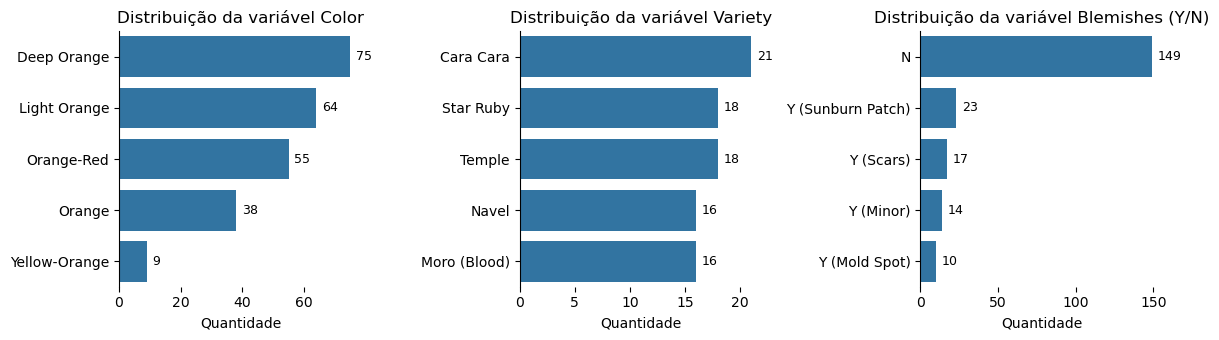

In [33]:
import math

# Lista de variáveis qualitativas
variaveis_qualitativas = (
    df_dict.query("tipo == 'qualitativa'")
           .variavel
           .to_list()
)

# Definir layout automaticamente
n_vars = len(variaveis_qualitativas)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(
    figsize=(4 * n_cols, 3.5 * n_rows),
    ncols=n_cols,
    nrows=n_rows
)

axes = axes.flatten()

for i, variavel in enumerate(variaveis_qualitativas):
    
    # Top 5 categorias mais frequentes
    order = df[variavel].value_counts().index[:5]
    
    ax = axes[i]
    
    sns.countplot(
        data=df,
        y=variavel,
        order=order,
        ax=ax
    )
    
    # Rótulos das barras
    ax.bar_label(
        ax.containers[0],
        fmt="%d",
        label_type="edge",
        padding=4,
        fontsize=9
    )
    
    ax.set(
        title=f"Distribuição da variável {variavel}",
        xlabel="Quantidade",
        ylabel=""
    )
    
    # Ajustes visuais
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

# Remover eixos vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

`Color`

Predominância de Deep Orange, Light Orange e Orange-Red

Yellow-Orange é minoritária

Leitura:

A cor concentra-se em tons mais maduros; categorias raras devem ser tratadas com cuidado (evitar ruído no modelo).

Uso no modelo:

Boa para análise descritiva

Pode entrar no Perceptron via one-hot, mas não é essencial para regressão

`Variety`

Distribuição relativamente equilibrada

Nenhuma variedade extremamente dominante

Leitura:

Variedades apresentam comportamentos distintos, mas sem viés extremo de amostragem.

Uso no modelo:

Excelente para boxplots e interpretação

Opcional no modelo (pode aumentar complexidade sem grande ganho)

`Blemishes (Y/N)`

Forte desbalanceamento: maioria sem manchas

Tipos de manchas bem menos frequentes

Leitura:

A presença de manchas é um evento menos comum, mas informativo.

Uso no modelo:

Muito boa variável para classificação

Forte sinal para Quality_bin

Pode ser usada como variável binária (0/1)

### Variáveis Quantitativas

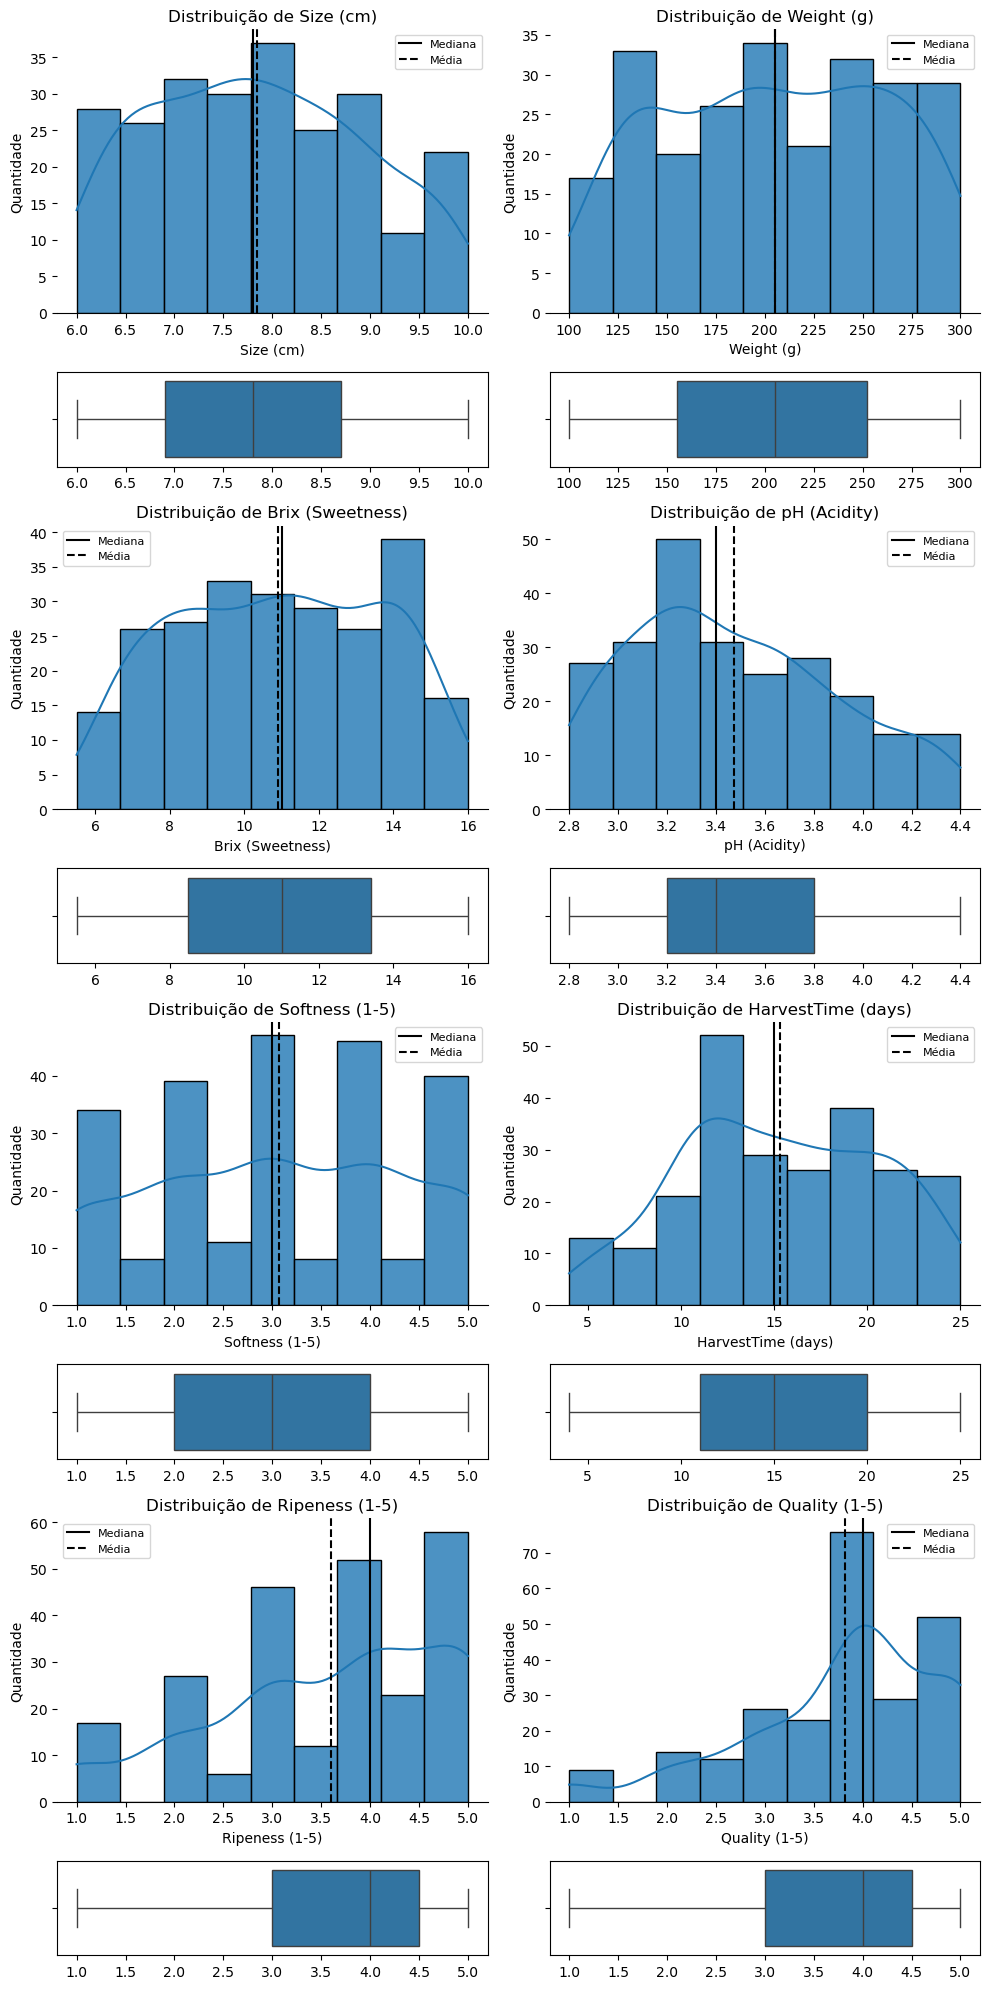

In [34]:
variaveis_quantitativas = df_dict.query("tipo == 'quantitativa'").variavel.to_list()

n = len(variaveis_quantitativas)
ncols = 2
nrows = (n + 1) // ncols  # Arredondamento pra cima

fig, axes = plt.subplots(
    figsize=(10, 5 * nrows),
    ncols=ncols,
    nrows=nrows * 2,  # Cada variável usa 2 linhas: 1 para histograma/KDE, 1 para boxplot
    gridspec_kw={"height_ratios": [3, 1] * nrows}
)

axes = axes.reshape(nrows, 2, 2)  # (variável, [hist, box], coluna)

for idx, variavel in enumerate(variaveis_quantitativas):
    row = idx // ncols
    col = idx % ncols

    # Histograma + KDE
    ax = sns.histplot(data=df, x=variavel, ax=axes[row][0][col], kde=True, alpha=.8)
    ax.axvline(df[variavel].median(), color="black", label="Mediana")
    ax.axvline(df[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição de {variavel}", ylabel="Quantidade")
    ax.legend(fontsize=8)
    ax.title.set_size(12)
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    # Boxplot
    sns.boxplot(data=df, x=variavel, ax=axes[row][1][col])
    axes[row][1][col].set(xlabel="")

# Ocultar subplots não usados (caso o número de variáveis não seja par)
if n % ncols != 0:
    for j in range(2):
        axes[-1][j][1].axis("off")

plt.tight_layout()
plt.show()

🟩 Variáveis quantitativas
 Size (cm)

Distribuição aproximadamente simétrica

Média ≈ mediana → sem assimetria relevante

Uso: variável estável, boa para regressão

Weight (g)

Distribuição ampla

Leve assimetria à direita

Leitura:

Peso sozinho não garante qualidade (coerente com correlação negativa).

Brix (Sweetness)

Distribuição bem comportada

Boa variação e densidade central

Leitura:

Variável-chave do dataset.

Uso:

Principal preditora da Quality (confirmado pela correlação)

pH (Acidity)

Leve assimetria

Intervalo coerente biologicamente

Uso: variável auxiliar importante

Softness (1–5)

Distribuição discreta, mas tratada como contínua

Pico próximo ao valor intermediário

Leitura:

Qualidade máxima tende a ocorrer em maciez intermediária.

HarvestTime (days)

Distribuição assimétrica

Concentração em tempos médios

Leitura:

Colheitas tardias aumentam variabilidade e risco de perda de qualidade.

Ripeness (1–5)

Distribuição inclinada para valores altos

Frutas majoritariamente maduras

Uso: variável importante, mas não dominante sozinha

Quality (1–5) (target)

Distribuição concentrada em valores altos

Leve assimetria à esquerda

Leitura:

Dataset tem mais frutas de boa qualidade — esperado em controle agrícola.

### Análise Bivariada


### Relação Entre Variáveis Quantitativas


### Comportamento par a par

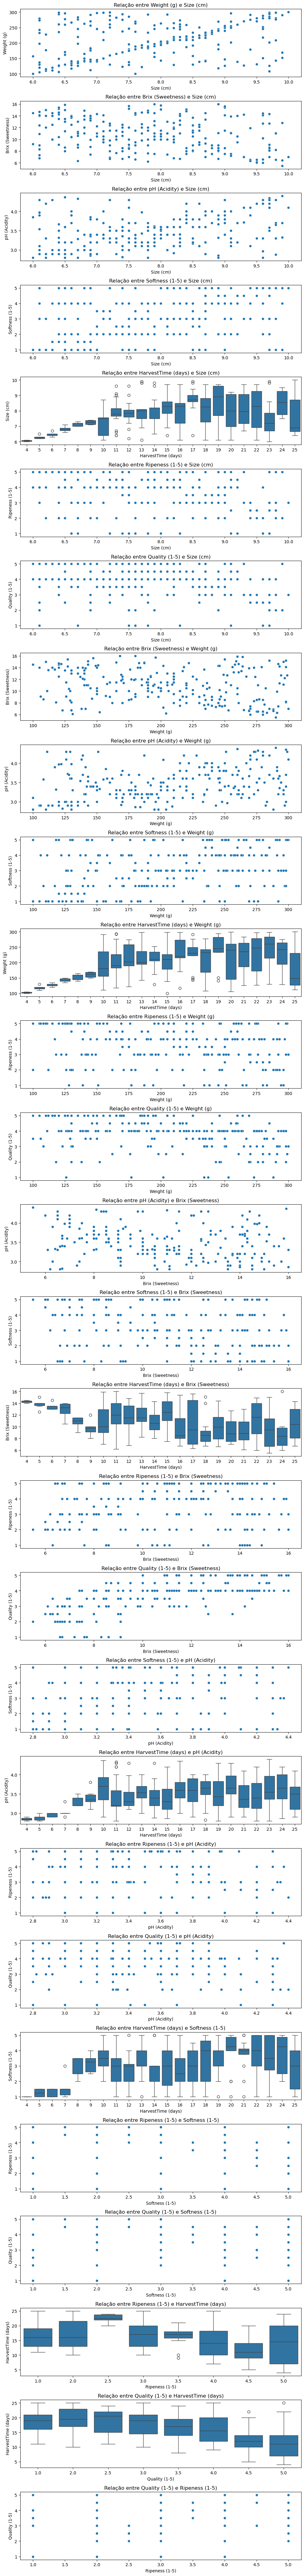

In [35]:
combinacoes = list(itertools.combinations(variaveis_quantitativas, 2))
num_combinacoes = len(combinacoes)

# Ajustar número de colunas e linhas dinamicamente
ncols = 1  # Por exemplo, fixar em 3 colunas
nrows = (num_combinacoes + ncols - 1) // ncols  # Calcular número de linhas necessário

fig, axes = plt.subplots(figsize=(10, 3 * nrows), ncols=ncols, nrows=nrows, squeeze=False)
axes = axes.flatten()

for i, (var_1, var_2) in enumerate(combinacoes):
    subtipos = df_dict.query('variavel == [@var_1, @var_2]').subtipo.to_list()
    if len(set(subtipos)) == 1:
        sns.scatterplot(data=df, x=var_1, y=var_2, ax=axes[i])
    else:
        sns.boxplot(data=df, y=var_1, x=var_2, ax=axes[i])
    axes[i].set(title=f"Relação entre {var_2} e {var_1}")

# Remover eixos não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlação

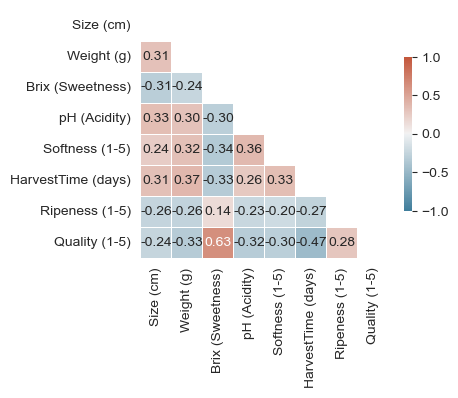

In [38]:
corr = df.drop(columns=variaveis_qualitativas).corr(numeric_only=True)

# Gerar uma máscara para o triângulo
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style("white")

# Configurar a figura
f, ax = plt.subplots(figsize=(4, 4))

# Gerar um mapa de calor divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Faz o mapa de calor com a máscara e a proporção correta
chart = sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    ax=ax, annot=True, fmt=".2f"
)
plt.show()

A matriz de correlação indicou que a variável `Brix` apresentou a maior associação positiva com a qualidade da fruta, enquanto `HarvestTime` mostrou correlação negativa moderada. As demais variáveis apresentaram correlações fracas a moderadas, sugerindo que a qualidade resulta da combinação de múltiplos fatores, o que justifica o uso de modelos preditivos multivariados.

> A análise exploratória indicou que as variáveis apresentam distribuições adequadas para modelagem preditiva. Observou-se que Brix, HarvestTime e Softness possuem maior influência sobre a qualidade, enquanto variáveis qualitativas como Blemishes apresentam forte potencial discriminatório para classificação.

## Regressão Linear

### Treino Regressão Linear

In [42]:
y = df["Quality (1-5)"]

features = ["Brix (Sweetness)", "HarvestTime (days)", "pH (Acidity)", "Softness (1-5)", "Ripeness (1-5)"]
X = df[features]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Normalização
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Modelo
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

# Predições
y_pred = lr.predict(X_test_sc)

# Métricas
mae_base = mean_absolute_error(y_test, y_pred)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred))

mae_base, rmse_base

(0.4762986742137244, np.float64(0.5891867923369444))

> Embora alguns valores extremos tenham sido identificados nas distribuições, estes representam variações naturais do processo agrícola. Assim, optou-se por não remover outliers, priorizando a preservação da variabilidade dos dados. Para reduzir possíveis impactos, foi aplicada normalização das variáveis antes da modelagem.

### Análise dos Coeficientes

In [48]:
coeficientes = pd.Series(
    lr.coef_,
    index=features
).sort_values(ascending=False)

coeficientes

Brix (Sweetness)      0.542373
Ripeness (1-5)        0.160690
Softness (1-5)        0.006236
pH (Acidity)         -0.095000
HarvestTime (days)   -0.213545
dtype: float64

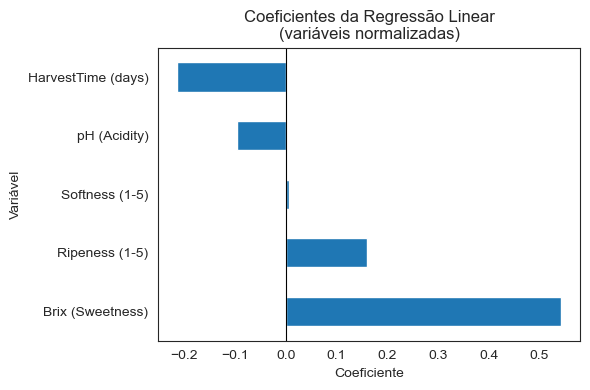

In [63]:
# Plot
plt.figure(figsize=(6, 4))
coeficientes.plot(kind="barh")

# Linha vertical no zero
plt.axvline(0, color="black", linewidth=0.8)

plt.title("Coeficientes da Regressão Linear\n(variáveis normalizadas)")
plt.xlabel("Coeficiente")
plt.ylabel("Variável")

plt.tight_layout()
plt.show()

> A análise dos coeficientes do modelo de regressão linear revelou que a variável `Brix (Sweetness)` apresenta o maior impacto positivo sobre a qualidade da fruta, destacando a doçura como principal fator preditivo. O `HarvestTime` apresentou efeito negativo relevante, indicando que colheitas tardias tendem a reduzir a qualidade. A `Ripeness` mostrou contribuição positiva moderada, enquanto `pH` apresentou influência negativa de menor magnitude. A variável `Softness` apresentou coeficiente próximo de zero, sugerindo que sua relação com a qualidade não é adequadamente capturada por um modelo linear simples.

## Perceptron

### Treino Perceptron

In [54]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

df["Quality_bin"] = (df["Quality (1-5)"] >= 3).astype(int)

features = ["Brix (Sweetness)", "Ripeness (1-5)", "Softness (1-5)", "pH (Acidity)", "HarvestTime (days)"]

X = df[features]
y = df["Quality_bin"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Normalização
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# Modelo Perceptron
perc = Perceptron(max_iter=1000, random_state=42)
perc.fit(X_train_sc, y_train)

# Predições
y_pred = perc.predict(X_test_sc)

# Métrica
acc = accuracy_score(y_test, y_pred)
acc

0.7868852459016393

### Extraindo e organizando os pesos do Perceptron

In [ ]:
pesos = pd.Series(
    perc.coef_[0],
    index=features
).sort_values(ascending=False)

pesos


Brix (Sweetness)      2.204509
pH (Acidity)          0.099576
Ripeness (1-5)       -0.157073
HarvestTime (days)   -0.772428
Softness (1-5)       -0.798921
dtype: float64

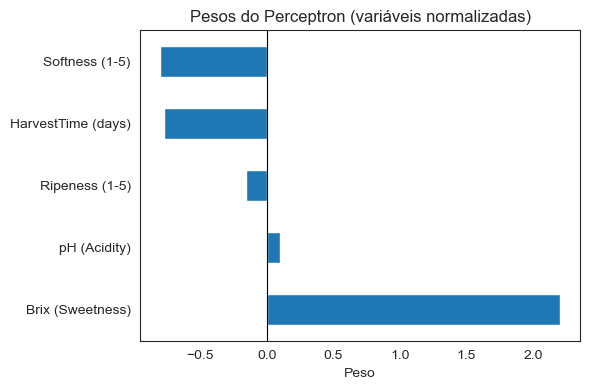

In [60]:
plt.figure(figsize=(6, 4))
pesos.plot(kind="barh")
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Pesos do Perceptron (variáveis normalizadas)")
plt.xlabel("Peso")
plt.tight_layout()
plt.show()

### Comparação direta: Regressão × Perceptron

In [ ]:
comparacao = pd.DataFrame({
    "Regressão": coeficientes,   # da regressão linear
    "Perceptron": pesos
})

comparacao


,Regressão,Perceptron
Brix (Sweetness),0.542373,2.204509
HarvestTime (days),-0.213545,-0.772428
Ripeness (1-5),0.160690,-0.157073
Softness (1-5),0.006236,-0.798921
pH (Acidity),-0.095000,0.099576


> O Perceptron atingiu acurácia de 78,7%, indicando boa capacidade de separar frutas de maior e menor qualidade. A variável Brix apresentou o maior peso positivo, confirmando a doçura como fator central. HarvestTime e Softness exibiram pesos negativos relevantes, sugerindo que colheitas tardias e maciez elevada estão associadas a menor qualidade. Ripeness e pH apresentaram pesos de baixa magnitude e sinais variáveis, o que sugere influência dependente do limiar de discretização e de efeitos combinados com outras variáveis.

### Matriz de confusão

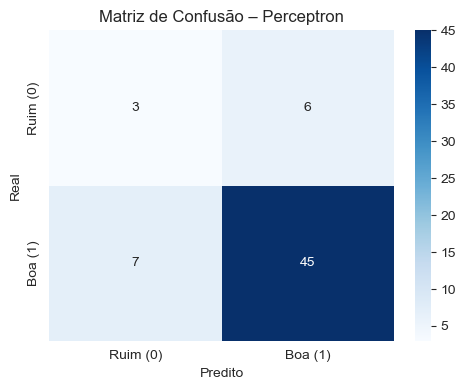

In [57]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Ruim (0)", "Boa (1)"],
    yticklabels=["Ruim (0)", "Boa (1)"]
)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Perceptron")
plt.tight_layout()
plt.show()

### Relatório de classificação (precisão, recall, F1)

In [58]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=["Qualidade Baixa", "Qualidade Boa"]
))


                 precision    recall  f1-score   support

Qualidade Baixa       0.30      0.33      0.32         9
  Qualidade Boa       0.88      0.87      0.87        52

       accuracy                           0.79        61
      macro avg       0.59      0.60      0.59        61
   weighted avg       0.80      0.79      0.79        61



### Validação Cruzada

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

X = df[features]
y = df["Quality_bin"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("perc", Perceptron(max_iter=1000, random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=cv,
    scoring="f1_weighted"
)

scores, scores.mean(), scores.std()

(array([0.80618467, 0.77705761, 0.89866255, 0.90193798, 0.81784802]),
 np.float64(0.8403381677057904),
 np.float64(0.050740453186766156))

> Para avaliar a robustez do modelo, foi aplicada validação cruzada estratificada com cinco partições, utilizando o F1-score ponderado como métrica. O Perceptron apresentou desempenho médio de 0,84, com desvio padrão de aproximadamente 0,05, indicando estabilidade e boa capacidade de generalização, mesmo diante do desbalanceamento das classes.

## Conclusão

Este trabalho teve como objetivo analisar e modelar a qualidade de frutas a partir de características físicas e químicas, utilizando dados reais e técnicas de aprendizado de máquina supervisionado. Inicialmente, a análise exploratória permitiu compreender o comportamento das variáveis e identificar relações relevantes, orientando a escolha dos modelos e garantindo coerência entre os dados e as abordagens adotadas.

A regressão linear mostrou-se adequada para a previsão do valor contínuo da qualidade, evidenciando a doçura (Brix) como o principal fator associado a maiores níveis de qualidade. Observou-se também que o tempo de colheita exerce influência negativa relevante, indicando que colheitas tardias tendem a comprometer a qualidade final do produto. Variáveis como maturação, acidez e maciez apresentaram efeitos secundários, reforçando a ideia de que a qualidade resulta da combinação de múltiplos fatores, e não de um único atributo isolado.

Na etapa de classificação, o Perceptron apresentou desempenho satisfatório na separação entre frutas de boa e baixa qualidade, alcançando acurácia próxima de 79%. A análise dos pesos do modelo revelou consistência com os resultados da regressão, confirmando a doçura e o tempo de colheita como variáveis centrais no processo decisório. Observou-se ainda que a maciez, embora pouco relevante na previsão contínua da qualidade, desempenha papel importante na separação entre classes, evidenciando diferenças conceituais entre tarefas de regressão e classificação.

A aplicação da validação cruzada estratificada reforçou a robustez do classificador, resultando em F1-score médio de aproximadamente 0,84, com baixa variabilidade entre os folds. Esse resultado indica que o desempenho do modelo é relativamente estável e não depende de uma única divisão do conjunto de dados, mesmo considerando o tamanho reduzido e o desbalanceamento das classes, características comuns em dados reais de controle agrícola.

Apesar dos resultados positivos, algumas limitações devem ser destacadas. O conjunto de dados apresenta número reduzido de amostras e forte desbalanceamento entre as classes, o que impacta principalmente a capacidade do modelo em identificar frutas de baixa qualidade. Além disso, a utilização de modelos lineares impõe restrições na captura de relações não lineares, observadas em algumas variáveis durante a análise exploratória. A discretização da qualidade para fins de classificação também implica perda de informação e sensibilidade à escolha do limiar adotado.

Como perspectivas para trabalhos futuros, sugere-se a ampliação e o balanceamento do conjunto de dados, bem como a aplicação de técnicas específicas para lidar com desbalanceamento de classes. A exploração de modelos não lineares, como regressões polinomiais, máquinas de vetor de suporte ou redes neurais mais profundas, pode permitir a captura de padrões mais complexos, possibilitando comparações entre desempenho e interpretabilidade. Adicionalmente, a inclusão de novas variáveis relacionadas a condições ambientais ou aspectos temporais pode tornar os modelos mais representativos de cenários reais de produção agrícola.

Em síntese, os resultados demonstram que modelos simples e interpretáveis, quando fundamentados em análise exploratória consistente e avaliação adequada, são capazes de fornecer previsões e classificações confiáveis, contribuindo de forma efetiva para o apoio à tomada de decisão no controle de qualidade agrícola.